In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

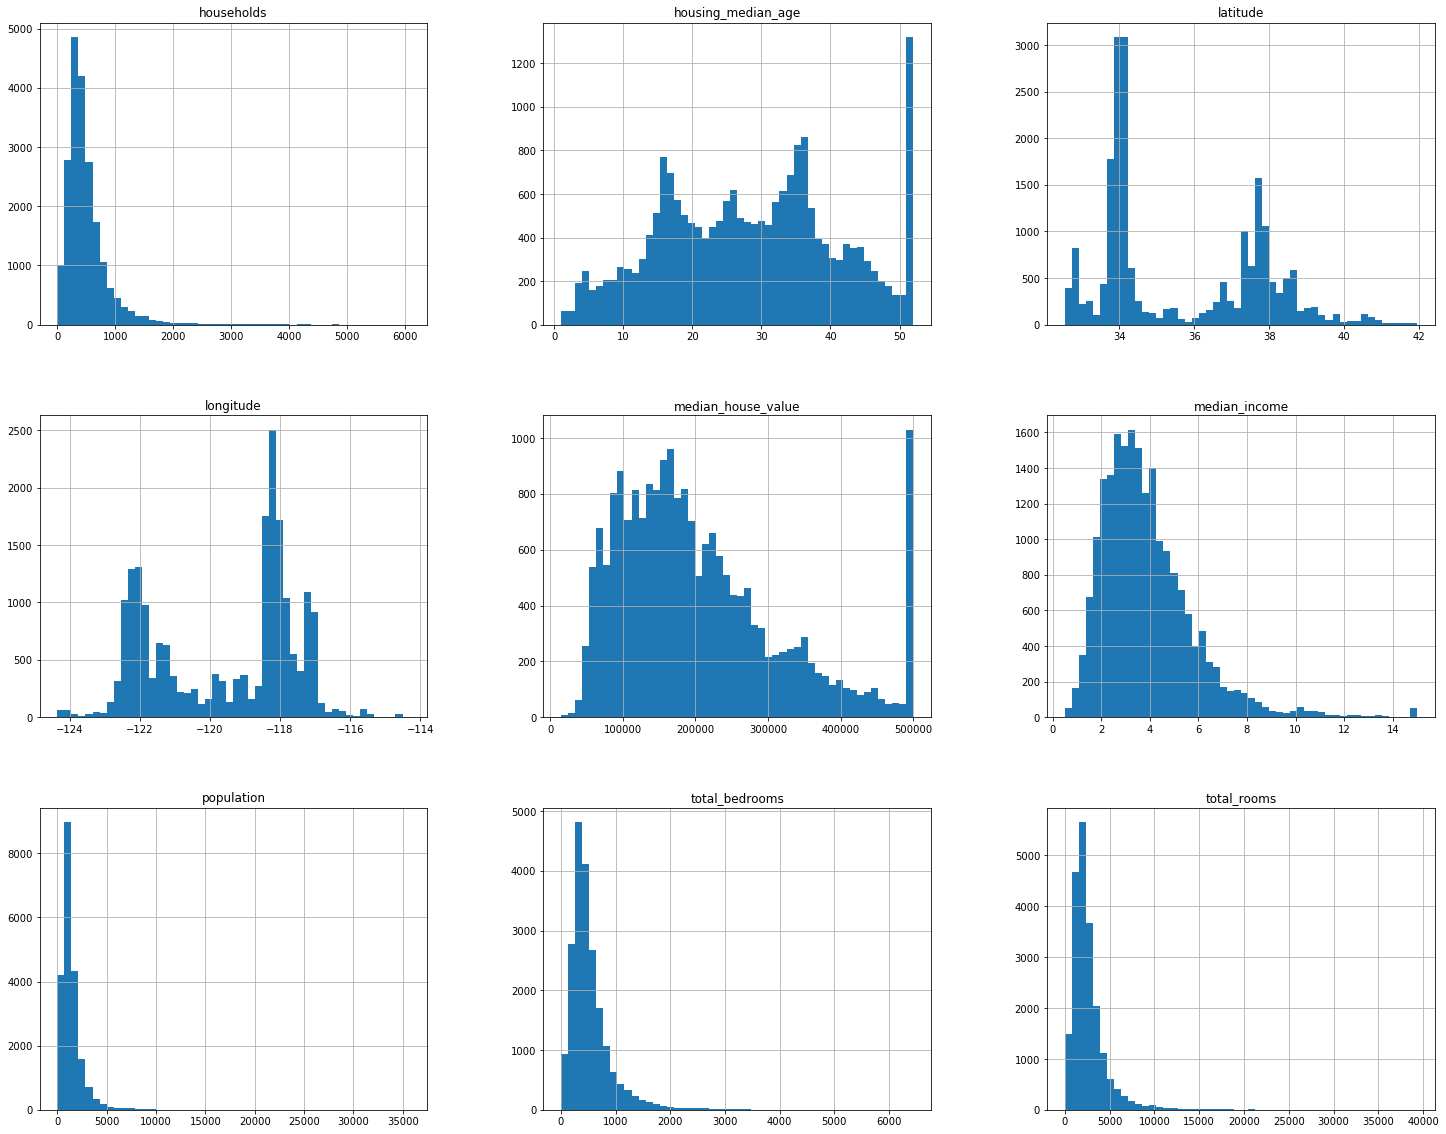

In [101]:
housing = pd.read_csv(filepath_or_buffer="dataset/housing.csv")
housing.hist(bins=50,figsize=(25,20))
plt.show()

Suppose you are came to know that median income is important attribute attribute to predict median hosing price. We may want to ensure that test set is representative of various categories of income in whole dataset. We will first discretize the median housing price attribute. We know that income attribute is clustered around 1.5 to 6 but some goes far beyond 6. Let’s make 5 categories by using pandas **`cut()`** method.

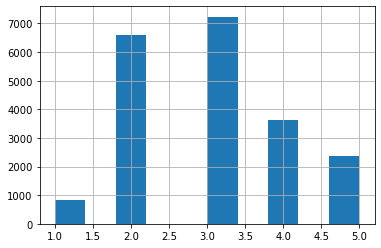

In [102]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])
housing["income_cat"].hist()

# 1. Random Sampling
---
This is generally used for all tasks and its belived to be shallow method for spliting data. It is randomly split an indexed data like dataframe, numpy array, list, tuple, etc. Here we are using functionality of sklearn library to do our task as it is simple to use and offers more handtuning opportunities.

### pros : 
* It's works for every case and simple.

### cons :
* Because of randomness, It does not cosider data distribution for splitting. Assume that if we got skew dataset and we are using this sampling method then it does not take gaurantee that it will sample test set having equivalent distribution as training. 

In [103]:
train_set, test_set = train_test_split(housing,test_size = 0.2,shuffle = True)


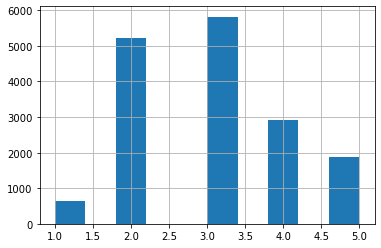

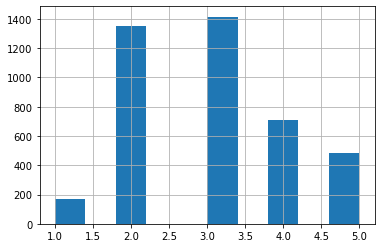

In [104]:
train_set["income_cat"].hist()
plt.show()
test_set["income_cat"].hist()
plt.show()

# 2. Stratified Sampling
---
It's sampling technique which take any reference of relevant features and stretegically splits the dataset such distribution of training data and testing data will be sampled equally with reference to that features. It's completely based on problem statement we have in our hand. In some situation, it's very hard to get important attribute in prior at that time we need to check analyze impact of each feature on taret attribute.

### pros:
* Really works well for regression, classification task.


Suppose you are came to know that median income is important attribute attribute to predict median hosing price. We may want to ensure that test set is representative of various categories of income in whole dataset. We will first discretize the median housing price attribute. We know that income attribute is clustered around 1.5 to 6 but some goes far beyond 6. Let’s make 5 categories by using pandas **`cut()`** method.

In [66]:
split = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2, random_state =42)
for train_index,test_index in split.split(X= housing, y=housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

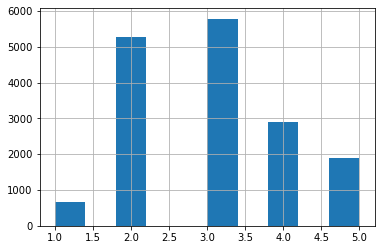

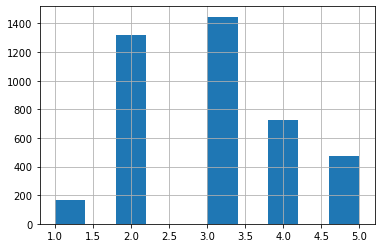

In [71]:
strat_train_set["income_cat"].hist()
plt.show()
strat_test_set["income_cat"].hist()
plt.show()

In [107]:
strat_test_set.drop(columns=["income_cat"],inplace = True)
strat_train_set.drop(columns=["income_cat"],inplace = True)

In [110]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
